## LÄS IN CSV FIL
-Identifiera kategorier



In [4]:
from src.io_utils import load_data, coerce_data_types

df_raw = load_data("data/ecommerce_sales.csv")
df_clean = coerce_data_types(df_raw)
print(df_clean.info())
print(df_raw.isna().sum())


def top_cities(df, n =int):
    return ((df.groupby("city")["revenue"].agg("sum").sort_values(ascending=False).head(n))/1000).round(1)

city_ranking = top_cities(df_clean, 3)
print("Topp städer efter intäkter i tusen:\n", city_ranking,sep="\n")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   order_id  2500 non-null   Int64         
 1   date      2500 non-null   datetime64[ns]
 2   city      2500 non-null   category      
 3   category  2500 non-null   category      
 4   price     2500 non-null   float64       
 5   units     2500 non-null   Int64         
 6   revenue   2500 non-null   float64       
dtypes: Int64(2), category(2), datetime64[ns](1), float64(2)
memory usage: 108.0 KB
None
order_id    0
date        0
city        0
category    0
price       0
units       0
revenue     0
dtype: int64
Topp städer efter intäkter i tusen:

city
Stockholm    1227.2
Göteborg      859.0
Malmö         567.9
Name: revenue, dtype: float64


C:\Users\marcu\AppData\Local\Temp\ipykernel_6272\2955552337.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return ((df.groupby("city")["revenue"].agg("sum").sort_values(ascending=False).head(n))/1000).round(1)


In [5]:
from src.ecommerce import Ecommerce_Analysis

analysis = Ecommerce_Analysis() # Initialises the class
analysis.show_summary() # Shows the summary in the class

Total revenue: 3,502,767 kr
Average Order Value: 1,401.11 kr
Total units sold: 7,463 units.
STD: 1,167 kr
Top-3 categories by revenue(kr):
0  Electronics  1364228.07
1       Sports   734653.42
2     Clothing   586744.91
Data integrity check passed: revenue = price x units


Visualization


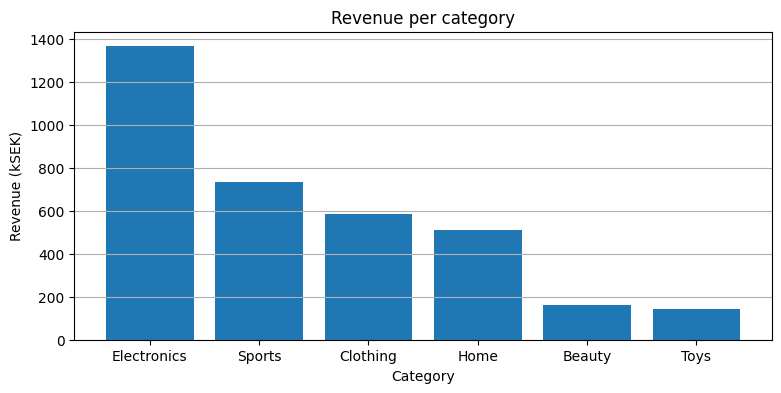

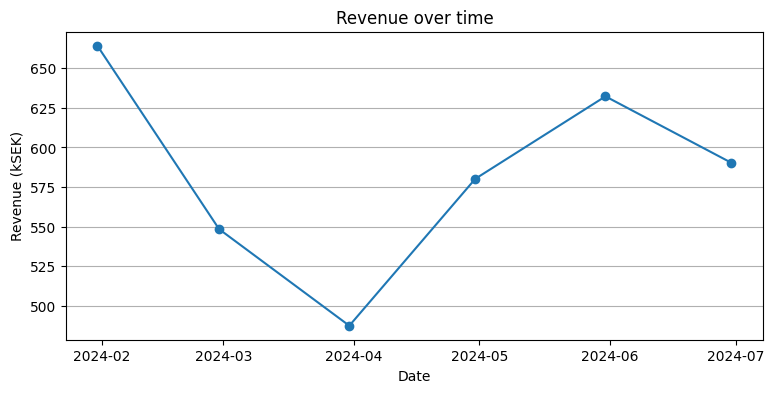

In [6]:
from src.metrics import revenue_by_category,revenue_over_time 
from src import viz as V
import matplotlib.pyplot as plt

# Revenue by category bar plot
revenue_cat = revenue_by_category(df_clean)
fig, ax = plt.subplots(figsize=(9, 4))
V.bar(ax, revenue_cat["category"], revenue_cat["revenue"]/1000, "Revenue per category", "Category", "Revenue (kSEK)")
plt.show()

# Revenue over time line plot
revenue_time = revenue_over_time(df_clean, "ME")
fig, ax = plt.subplots(figsize=(9, 4))
V.line(ax, revenue_time["date"], revenue_time["revenue"]/1000, "Revenue over time", "Date", "Revenue (kSEK)")
plt.show()